# Classification of images

In [1]:
import numpy as np 
np.object = np.object_
np.bool = bool
np.int = int

In [2]:
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

## Loading the images

In [3]:
path = 'fer_images.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

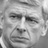

In [4]:
tf.keras.preprocessing.image.load_img('fer2013/train/Angry/1008.jpg')

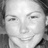

In [5]:
image = tf.keras.preprocessing.image.load_img('fer2013/train/Happy/1.jpg')
image

## Train and test dataset

In [6]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('fer2013/train',
                                                        target_size = (48, 48),
                                                        batch_size = 16,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 28709 images belonging to 7 classes.


In [7]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [8]:
np.unique(train_dataset.classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171], dtype=int64))

In [9]:
#sns.countplot(x = train_dataset.classes);

In [10]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('fer2013/validation',
                                                  target_size = (48, 48),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 3589 images belonging to 7 classes.


## Building and training the CNN

Based on:
https://github.com/rajeevratan84/DeepLearningCV/blob/master/18.2%20Building%20an%20Emotion%20Detector%20with%20LittleVGG.ipynb


Padding:
https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow


BatchNormalization: https://keras.io/api/layers/normalization_layers/batch_normalization/


Dropout: https://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf

In [11]:
num_detectors = 32
num_classes = 7
width, height = 48, 48
epochs = 70

network = Sequential()

network.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same', input_shape = (width, height, 3)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes, activation='softmax'))
print(network.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

In [12]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
network.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/70
1795/1795 [==============================] - 104s 55ms/step - loss: 1.8542 - accuracy: 0.2674 - val_loss: 1.7601 - val_accuracy: 0.2719
Epoch 2/70
1795/1795 [==============================] - 25s 14ms/step - loss: 1.5595 - accuracy: 0.3934 - val_loss: 1.5280 - val_accuracy: 0.4021
Epoch 3/70
1795/1795 [==============================] - 24s 13ms/step - loss: 1.4004 - accuracy: 0.4611 - val_loss: 1.6923 - val_accuracy: 0.3778
Epoch 4/70
1795/1795 [==============================] - 24s 14ms/step - loss: 1.3211 - accuracy: 0.4974 - val_loss: 1.3982 - val_accuracy: 0.4918
Epoch 5/70
1795/1795 [==============================] - 23s 13ms/step - loss: 1.2612 - accuracy: 0.5243 - val_loss: 1.3759 - val_accuracy: 0.5032
Epoch 6/70
1795/1795 [==============================] - 23s 13ms/step - loss: 1.2129 - accuracy: 0.5451 - val_loss: 1.3932 - val_accuracy: 0.4720
Epoch 7/70
1795/1795 [==============================] - 23s 13ms/step - loss: 1.1785 - accuracy: 0.5622 - val_loss: 1.3708 

## Saving and loading the model

In [14]:
model_json = network.to_json()
with open('models/emotions/network_emotions.json','w') as json_file:
  json_file.write(model_json)

In [17]:
from tensorflow.keras.models import save_model
network_saved = save_model(network, 'models/emotions/weights_emotions.keras')

In [18]:
with open('models/emotions/network_emotions.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon": 0.001, "c

## Evaluating the network

In [19]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('models/emotions/weights_emotions.keras')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [20]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

In [21]:
network_loaded.evaluate(test_dataset)

3589/3589 [==============================] - 7s 2ms/step - loss: 1.5435 - accuracy: 0.5890


[1.5435280799865723, 0.5890220403671265]

In [22]:
predictions = network_loaded.predict(test_dataset)
predictions

array([[8.4874105e-01, 1.9854402e-02, 2.1490296e-02, ..., 6.6702209e-02,
        3.6586910e-02, 6.8784948e-04],
       [9.4159132e-01, 1.2923010e-04, 4.5059588e-02, ..., 9.9646719e-04,
        1.2713422e-03, 2.2152215e-03],
       [9.8859543e-01, 3.0183903e-04, 2.1102596e-03, ..., 2.4192263e-03,
        6.3661826e-03, 9.7667680e-06],
       ...,
       [4.7225384e-03, 5.3243901e-05, 5.5749599e-02, ..., 5.7291412e-03,
        2.6620137e-02, 9.0712178e-01],
       [4.9432614e-03, 8.9600953e-06, 4.3609228e-02, ..., 3.1403448e-02,
        1.3980651e-02, 9.0359235e-01],
       [1.4974197e-02, 1.3004740e-04, 2.6486386e-02, ..., 3.2147563e-03,
        1.3043911e-02, 9.4001466e-01]], dtype=float32)